In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# locations that we are interested in
locations_of_interest = ['Quebec', 'Ontario']

In [28]:
# Load the ev raw data
ev_data_base = pd.read_csv('data/ev.csv')

# convert the REF_DATE to a datetime object
ev_data_base['REF_DATE'] = pd.to_datetime(ev_data_base['REF_DATE'])
ev_data_base.rename(columns={'REF_DATE': 'date', 'VALUE': 'value'}, inplace=True)
all_locations = ev_data_base["GEO"].unique()
# make sure no typo
assert all([loc in all_locations for loc in locations_of_interest]), "One of the locations is not in the data"

ev_data_qc = ev_data_base[ev_data_base['GEO'] == locations_of_interest[0]][['date', 'value']]
ev_data_on = ev_data_base[ev_data_base['GEO'] == locations_of_interest[1]][['date', 'value']]

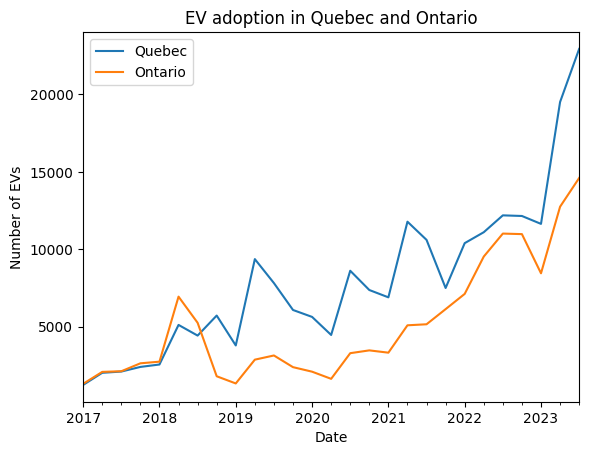

In [47]:
# time series plot of the ev adoption
fig, ax = plt.subplots()
ev_data_qc.plot(x='date', y='value', ax=ax, label=locations_of_interest[0])
ev_data_on.plot(x='date', y='value', ax=ax, label=locations_of_interest[1])
ax.set_ylabel('Number of EVs')
ax.set_xlabel('Date')
ax.set_title('EV adoption in Quebec and Ontario')
plt.show()


In [58]:
# load Quebec air quality data
qc_aq_16_18 = pd.read_csv('data/Quebec/2016-2018.csv')
qc_aq_19_21 = pd.read_csv('data/Quebec/2019-2021.csv')
qc_aq_22_24 = pd.read_csv('data/Quebec/2022-2024.csv')

qc_aq_base = pd.concat([qc_aq_16_18, qc_aq_19_21, qc_aq_22_24])
qc_aq_base.rename(columns={
    'polluant': 'pollutant',
    'valeur': 'value',
    'heure': 'hour'}, inplace=True)

qc_aq_base['date'] = pd.to_datetime(qc_aq_base['date'])
# drop the station and hour columns
qc_aq_base = qc_aq_base.drop(columns=['stationId', 'hour'])

qc_aq={}
for pollutant in qc_aq_base['pollutant'].unique():
    # make value the average of the day
    qc_aq[pollutant] = qc_aq_base[qc_aq_base['pollutant'] == pollutant][['date', 'value']].groupby('date').mean()


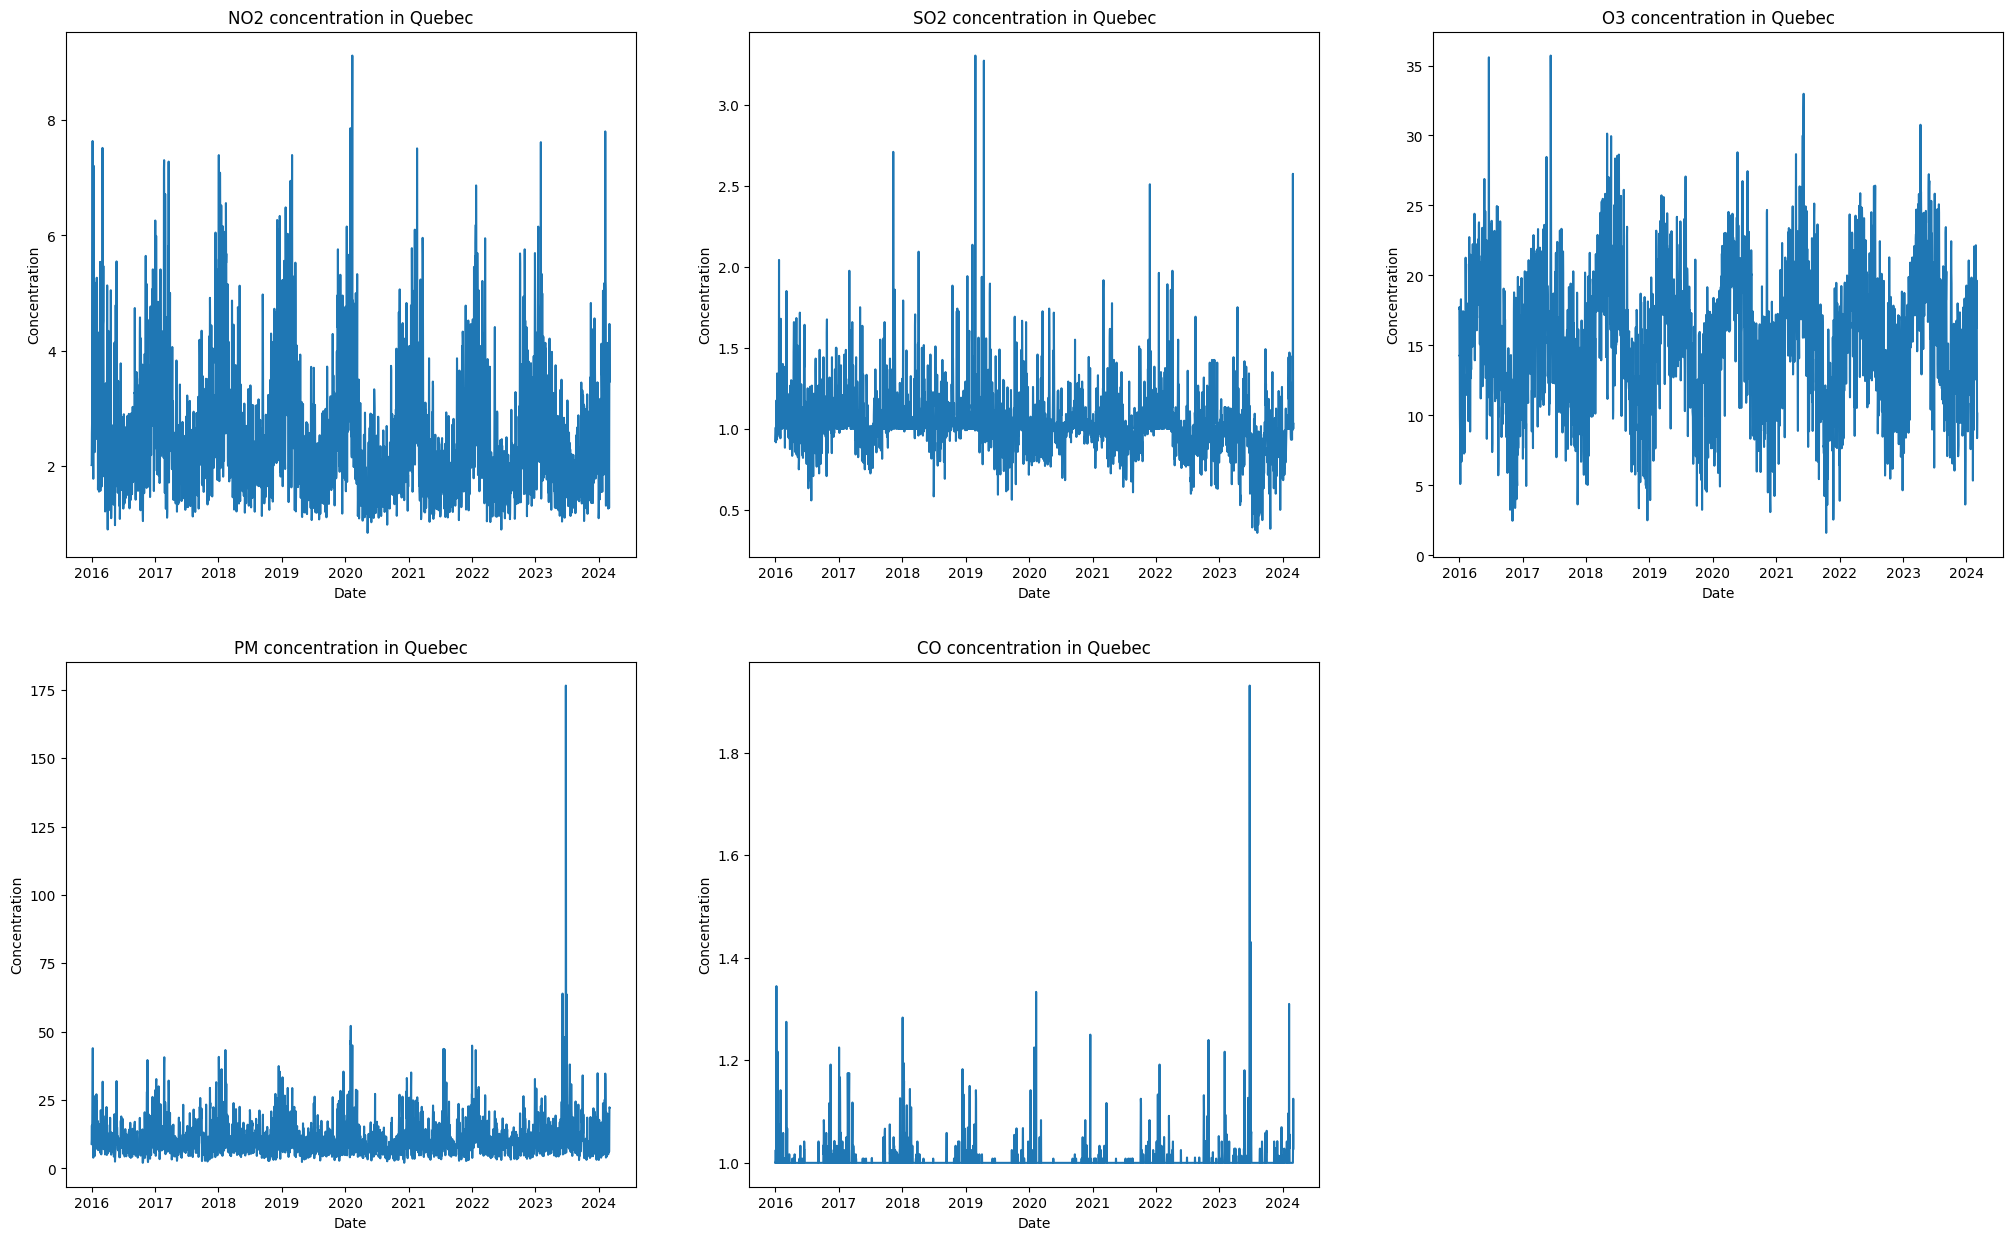

In [59]:
#time series plot for each pollutant, 2*3 subplots
plt.figure(figsize=(25, 15))
for i in range(len(qc_aq)):
    plt.subplot(2, 3, i+1)
    plt.plot(qc_aq[list(qc_aq.keys())[i]])
    plt.title(list(qc_aq.keys())[i] + ' concentration in Quebec')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
plt.show()

    

